In [1]:
DATASET_LOCATION = 'C:\\Users\\andreea.iosip\\data1a\\training'

In [4]:
import os
cars = [x[0] for x in os.walk(DATASET_LOCATION)]
carswhole = cars[2]
carsdamaged = cars[1]
carswhole_list = os.listdir(carswhole)
cardamaged_list = os.listdir(carsdamaged)
filenames = os.listdir(DATASET_LOCATION)
classes = []
for cars in carswhole_list:
    classes.append(0)
for cars in cardamaged_list:
    classes.append(1)

cars_all_lists = carswhole_list + cardamaged_list   


In [5]:
import pandas as pd
df = pd.DataFrame({
    'filename': cars_all_lists,
    'category': classes
})
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [6]:
df.head()

,filename,category
0,whole-car (1).JPEG,cat
1,whole-car (1).jpg,cat
2,whole-car (10).JPEG,cat
3,whole-car (10).jpg,cat
4,whole-car (100).JPEG,cat


In [7]:
df.category.value_counts()

cat    920
dog    920
Name: category, dtype: int64

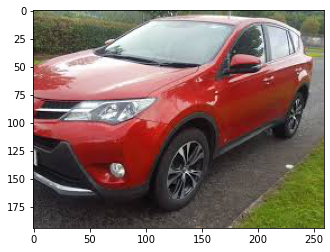

In [9]:
import random
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
sample1 = random.choice(cars_all_lists)
image1 = load_img(DATASET_LOCATION+"/"+sample1)
plt.imshow(image1)

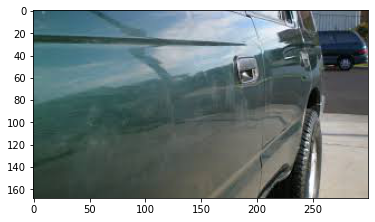

In [10]:
sample2 = random.choice(cars_all_lists)
image2 = load_img(DATASET_LOCATION+"/"+sample2)
plt.imshow(image2)

In [11]:
image1.size

(259, 194)

In [12]:
image2.size

(300, 168)

In [13]:
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
INPUT_SHAPE=(IMAGE_WIDTH, IMAGE_HEIGHT, 1)

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=INPUT_SHAPE))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [15]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42)

In [16]:
BATCH_SIZE = 16

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    DATASET_LOCATION, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    color_mode='grayscale'
)

Found 1472 validated image filenames belonging to 2 classes.


In [17]:
from keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 16
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    DATASET_LOCATION, 
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale'
)

Found 368 validated image filenames belonging to 2 classes.


In [18]:
example_df = train_df.sample(n=1)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    DATASET_LOCATION, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 1 validated image filenames belonging to 1 classes.


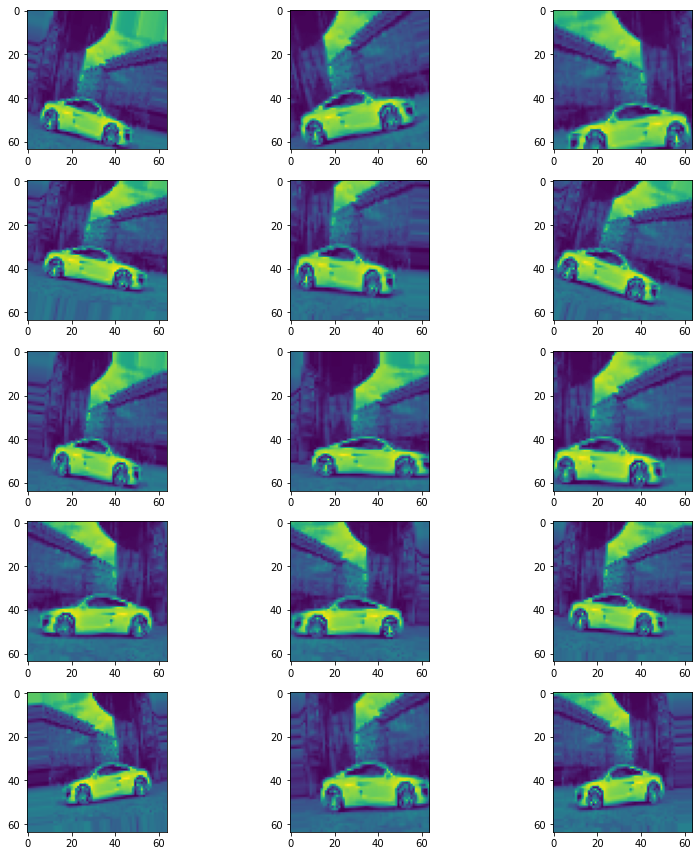

In [19]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        image = image.reshape(IMAGE_SIZE)
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [20]:
EPOCHS = 10
history = model.fit_generator(
    train_generator, 
    epochs=EPOCHS,
    validation_data=test_generator,
    validation_steps=test_df.shape[0]//BATCH_SIZE,
    steps_per_epoch=train_df.shape[0]//BATCH_SIZE
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
92/92 [==============================] - 56s 610ms/step - loss: 0.6932 - accuracy: 0.5075 - val_loss: 0.6890 - val_accuracy: 0.5761
Epoch 2/10
92/92 [==============================] - 32s 347ms/step - loss: 0.6920 - accuracy: 0.5279 - val_loss: 0.6883 - val_accuracy: 0.5734
Epoch 3/10
92/92 [==============================] - 33s 359ms/step - loss: 0.6959 - accuracy: 0.5000 - val_loss: 0.6875 - val_accuracy: 0.6033
Epoch 4/10
92/92 [==============================] - 32s 352ms/step - loss: 0.6932 - accuracy: 0.4898 - val_loss: 0.6880 - val_accuracy: 0.5897
Epoch 5/10
92/92 [==============================] - 34s 365ms/step - loss: 0.6938 - accuracy: 0.5027 - val_loss: 0.6878 - val_accuracy: 0.5761
Epoch 6/10
92/92 [==============================] - 40s 440ms/step - loss: 0.6917 - accuracy: 0.5306 - val_loss: 0.6869 - val_accuracy: 0.5897
Epoch 7/10
92/92 [==============================] - 37s 399ms/step

In [27]:
NUM_SAMPLES = cars_all_lists = carswhole_list + cardamaged_list   

sample_test_df = test_df.head(NUM_SAMPLES).reset_index(drop=True)
sample_test_datagen = ImageDataGenerator(rescale=1./255)
sample_test_generator = sample_test_datagen.flow_from_dataframe(
    sample_test_df, 
    DATASET_LOCATION, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    color_mode='grayscale'
)

Found 10 validated image filenames belonging to 2 classes.


In [28]:
predict = model.predict_generator(sample_test_generator)

In [29]:
import numpy as np
predictions = np.argmax(predict, axis=-1)

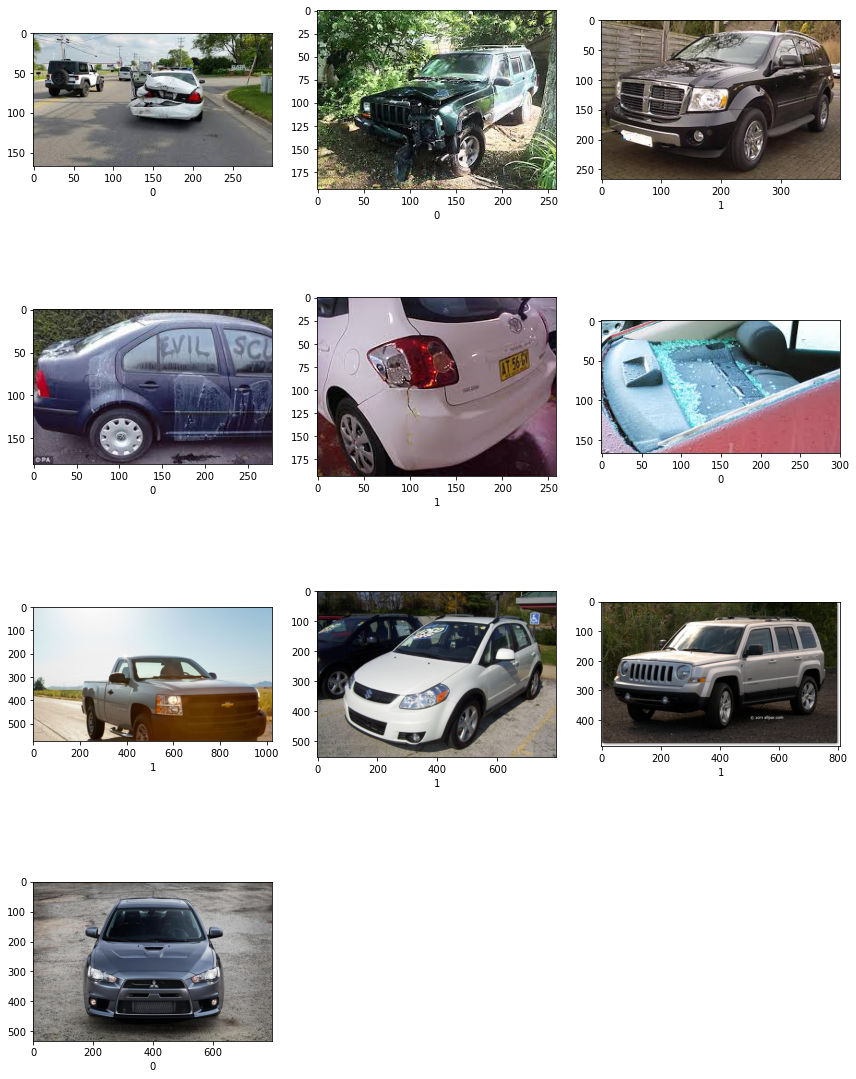

In [34]:
plt.figure(figsize=(12, 24))
for index, row in sample_test_df.iterrows():
    filename = row['filename']
    prediction = predictions[index]
    img = load_img(DATASET_LOCATION+"/"+filename)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(prediction)
plt.tight_layout()
plt.show()